# Feature Points Detection

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

imagesDir = './data'

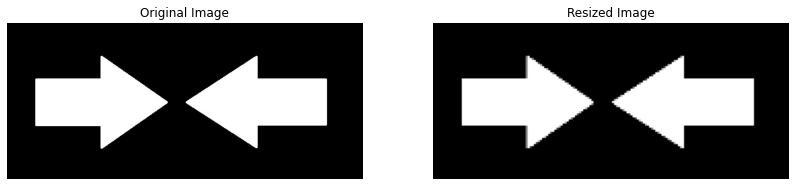

In [2]:
filename = 'corners_01.jpg'
img = cv2.imread(os.path.join(imagesDir, filename))
img_resize = cv2.resize(img, (0,0), fx=0.25, fy=0.25)

fig, ax = plt.subplots(1,2,figsize=(14,10))

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img_resize)
ax[1].set_title('Resized Image')
ax[1].axis('off')

plt.show()

## Corner Detection

[Harris Corner Detector](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345)

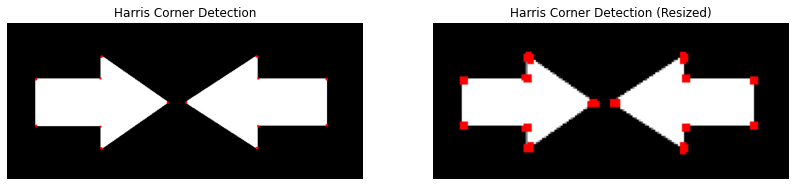

In [3]:
copy = img.copy() # copy the image to be able to use it later without having to read it again
copy_resize = img_resize.copy() # copy the image to be able to use it later without having to read it again

gray = cv2.cvtColor(copy, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
gray_resize = cv2.cvtColor(copy_resize, cv2.COLOR_BGR2GRAY)
gray_resize = np.float32(gray_resize)

neighbourhood = 2
aperture = 3
free_param = 0.04
dst = cv2.cornerHarris(gray, neighbourhood, aperture, free_param)
dst_resize = cv2.cornerHarris(gray_resize, neighbourhood, aperture, free_param)

# Result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)
dst_resize = cv2.dilate(dst_resize, None)

# Threshold for an optimal value, it may vary depending on the image
thr = 0.01

copy[dst > thr*dst.max()] = [0,0,255]
copy_resize[dst_resize > thr*dst_resize.max()] = [0,0,255]

# Convert to RGB for plotting with matplotlib
out = cv2.cvtColor(copy, cv2.COLOR_BGR2RGB)
out_resize = cv2.cvtColor(copy_resize, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,2,figsize=(14,10))

ax[0].imshow(out)
ax[0].set_title('Harris Corner Detection')
ax[0].axis('off')

ax[1].imshow(out_resize)
ax[1].set_title('Harris Corner Detection (Resized)')
ax[1].axis('off')

plt.show()

[Shi-Tomasi Corner Detector](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541)

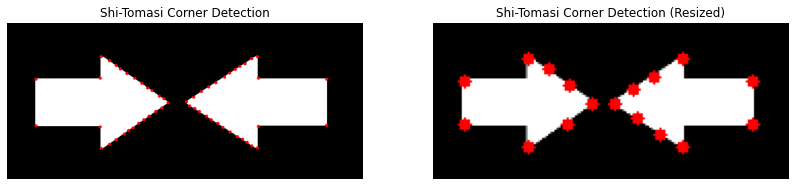

In [4]:
copy = img.copy() # copy the image to be able to use it later without having to read it again
copy_resize = img_resize.copy() # copy the image to be able to use it later without having to read it again

max_corners = 200
quality = 0.01
mindist = 10
corners = cv2.goodFeaturesToTrack(gray, max_corners, quality, mindist, blockSize=neighbourhood, k=free_param)
corners = np.int0(corners)
corners_resized = cv2.goodFeaturesToTrack(gray_resize, max_corners, quality, mindist, blockSize=neighbourhood, k=free_param)
corners_resized = np.int0(corners_resized)

def draw_corners(corners, copy):
    for i in corners:
        x,y = i.ravel()
        cv2.circle(copy, (x,y), 3, 255, -1)
        
draw_corners(corners, copy)
draw_corners(corners_resized, copy_resize)

fig, ax = plt.subplots(1,2,figsize=(14,10))

ax[0].imshow(copy)
ax[0].set_title('Shi-Tomasi Corner Detection')
ax[0].axis('off')

ax[1].imshow(copy_resize)
ax[1].set_title('Shi-Tomasi Corner Detection (Resized)')
ax[1].axis('off')

plt.show()

[FAST Corner Detector](https://docs.opencv.org/4.x/df/d74/classcv_1_1FastFeatureDetector.html)

Threshold: 10
NMS:True
Neighborhood: 2
Total Keypoints with NMS: 14
Total Keypoints with NMS (Resized): 7


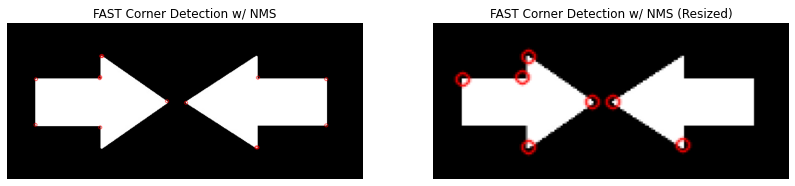

Total Keypoints without NMS: 92
Total Keypoints without NMS (Resized): 101


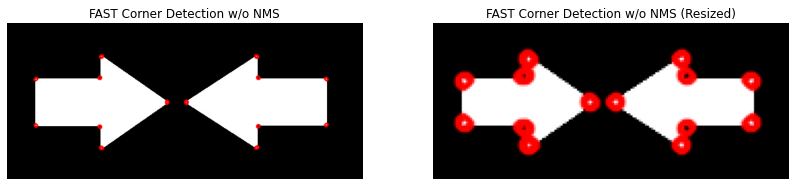

In [5]:
copy = img.copy() # copy the image to be able to use it later without having to read it again
copy_resize = img_resize.copy() # copy the image to be able to use it later without having to read it again

# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# Find and draw the keypoints
kp = fast.detect(copy, None)
fast1 = cv2.drawKeypoints(copy, kp, None, color=(255,0,0))

kp_resize = fast.detect(copy_resize, None)
fast1_resize = cv2.drawKeypoints(copy_resize, kp_resize, None, color=(255,0,0))

# Print all default params
print("Threshold: {}".format(fast.getThreshold()))
print("NMS:{}".format(fast.getNonmaxSuppression()))
print("Neighborhood: {}".format(fast.getType()))
print("Total Keypoints with NMS: {}".format(len(kp)))
print("Total Keypoints with NMS (Resized): {}".format(len(kp_resize)))

fig, ax = plt.subplots(1,2,figsize=(14,10))

ax[0].imshow(fast1)
ax[0].set_title('FAST Corner Detection w/ NMS')
ax[0].axis('off')

ax[1].imshow(fast1_resize)
ax[1].set_title('FAST Corner Detection w/ NMS (Resized)')
ax[1].axis('off')

plt.show()

# Disable NMS
fast.setNonmaxSuppression(0)
kp = fast.detect(copy, None)
kp_resize = fast.detect(copy_resize, None)
print("Total Keypoints without NMS: {}".format(len(kp)))
print("Total Keypoints without NMS (Resized): {}".format(len(kp_resize)))
fast2 = cv2.drawKeypoints(copy, kp, None, color=(255,0,0))
fast2_resize = cv2.drawKeypoints(copy_resize, kp_resize, None, color=(255,0,0))

fig, ax = plt.subplots(1,2,figsize=(14,10))

ax[0].imshow(fast2)
ax[0].set_title('FAST Corner Detection w/o NMS')
ax[0].axis('off')

ax[1].imshow(fast2_resize)
ax[1].set_title('FAST Corner Detection w/o NMS (Resized)')
ax[1].axis('off')

plt.show()

## Blob Detection

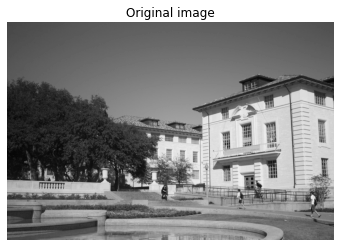

In [6]:
new_img = cv2.imread(os.path.join(imagesDir, 'stitch_building01_1.png'))
gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.show()

[SIFT Blob Detector](https://docs.opencv.org/4.x/d7/d60/classcv_1_1SIFT.html)

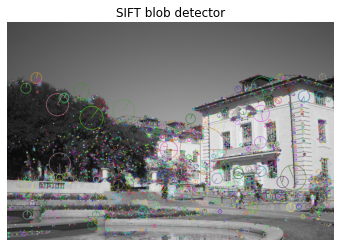

In [7]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# Find the keypoints
kp = sift.detect(gray,None)

# Draw the keypoints (with size and orientation)
sift_img = cv2.drawKeypoints(gray, kp, None, (-1, -1, -1), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(sift_img)
plt.title('SIFT blob detector')
plt.axis('off')
plt.show()

[ORB Blob Detector](https://docs.opencv.org/4.x/db/d95/classcv_1_1ORB.html)

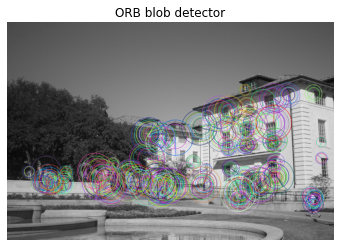

In [8]:
# Initiate ORB detector
orb = cv2.ORB_create()

# Find the keypoints with ORB
kp = orb.detect(gray, None)

# Compute the descriptors with ORB
kp, des = orb.compute(gray, kp)

# Draw only keypoints location, not size and orientation
orb_img = cv2.drawKeypoints(gray, kp, None, (-1, -1, -1), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(orb_img)
plt.title('ORB blob detector')
plt.axis('off')
plt.show()

## Matching

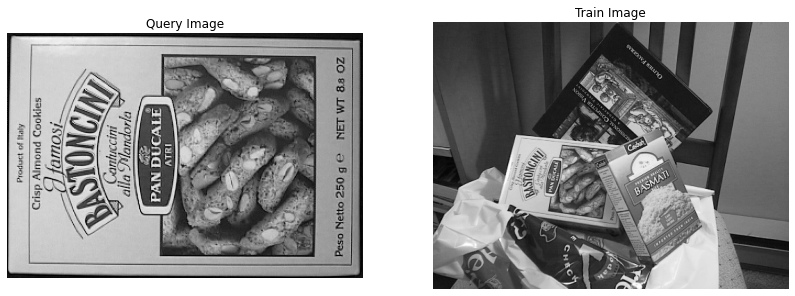

In [9]:
query = cv2.imread(os.path.join(imagesDir, 'match_box01a_1.png'), cv2.IMREAD_GRAYSCALE) # queryImage
train = cv2.imread(os.path.join(imagesDir, 'match_box01a_2.png'), cv2.IMREAD_GRAYSCALE) # trainImage

fig, ax = plt.subplots(1,2,figsize=(14,10))

ax[0].imshow(query, cmap='gray')
ax[0].set_title('Query Image')
ax[0].axis('off')

ax[1].imshow(train, cmap='gray')
ax[1].set_title('Train Image')
ax[1].axis('off')

plt.show()

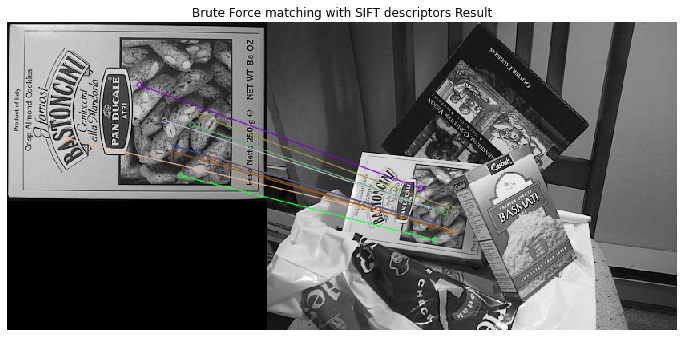

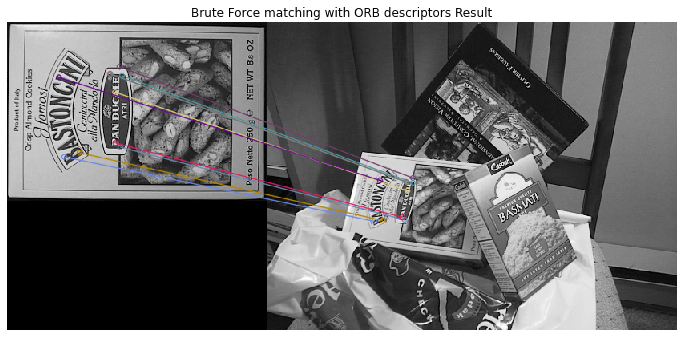

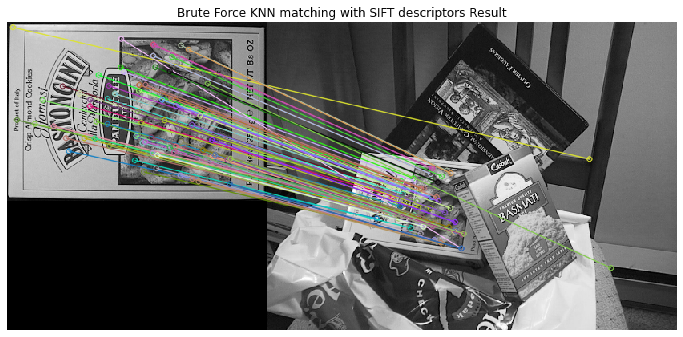

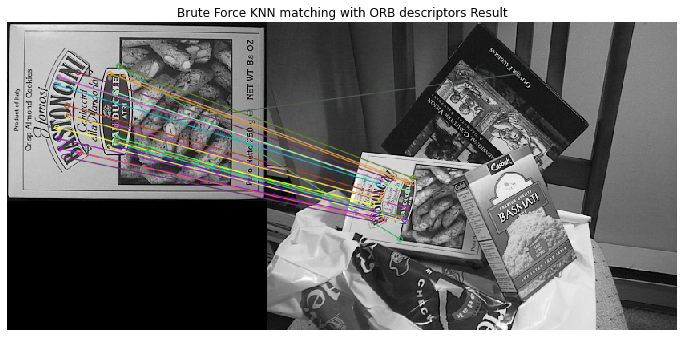

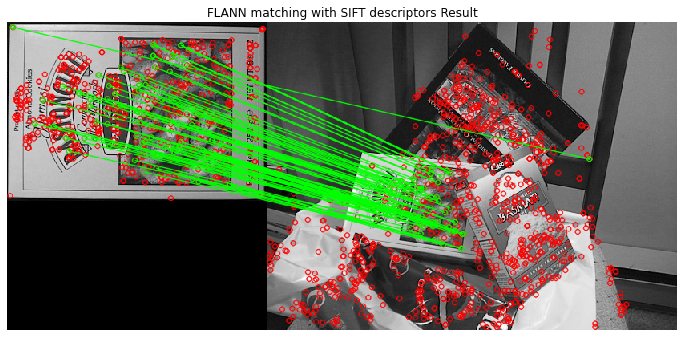

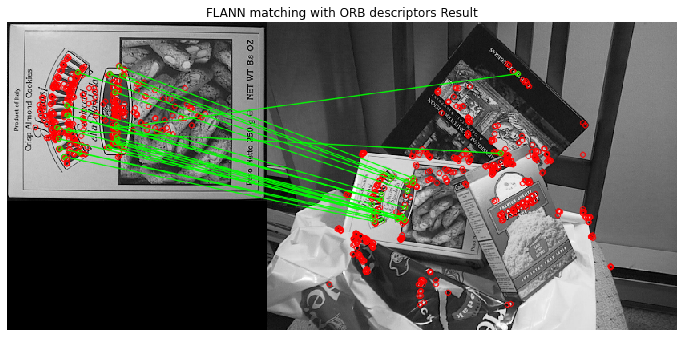

In [10]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# Initiate ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with SIFT
sift_kp1, sift_des1 = sift.detectAndCompute(query, None)
sift_kp2, sift_des2 = sift.detectAndCompute(train, None)

# Find the keypoints and descriptors with ORB
orb_kp1, orb_des1 = orb.detectAndCompute(query, None)
orb_kp2, orb_des2 = orb.detectAndCompute(train, None)

# Create a Brute Force Matcher object with default params, good for SIFT Descriptors
sift_bf = cv2.BFMatcher()
# Create a Brute Force Matcher object with Hamming distance as measurement, good for ORB Descriptors
orb_bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
orb_bf_knn = cv2.BFMatcher(cv2.NORM_HAMMING)

# Create a FLANN Matcher object with parameters
FLANN_INDEX_KDTREE = 1
FLANN_INDEX_LSH = 6
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
index_params_orb_flann = dict(algorithm = FLANN_INDEX_LSH, table_number = 6, key_size = 12, multi_probe_level = 1)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params, search_params)
flann_orb = cv2.FlannBasedMatcher(index_params_orb_flann, search_params)

# Match descriptors
sift_matches = sift_bf.match(sift_des1, sift_des2)
sift_matches_knn = sift_bf.knnMatch(sift_des1, sift_des2, k=2)
sift_flann_matches_knn = flann.knnMatch(sift_des1, sift_des2, k=2)
orb_matches = orb_bf.match(orb_des1, orb_des2)
orb_matches_knn = orb_bf_knn.knnMatch(orb_des1, orb_des2, k=2)
orb_flann_matches_knn = flann_orb.knnMatch(orb_des1, orb_des2, k=2)

# Sort SIFT and ORB matches in the order of their distance
sift_matches = sorted(sift_matches, key = lambda x:x.distance)
orb_matches = sorted(orb_matches, key = lambda x:x.distance)

# Apply ratio test
sift_good = []
for m,n in sift_matches_knn:
    if m.distance < 0.75*n.distance:
        sift_good.append([m])

orb_good = []
for m,n in orb_matches_knn:
    if m.distance < 0.75*n.distance:
        orb_good.append([m])

# Need to draw only good matches, so create a mask
sift_flann_matches_mask = [[0,0] for i in range(len(sift_flann_matches_knn))]
orb_flann_matches_mask = [[0,0] for i in range(len(orb_flann_matches_knn))]

# Ratio test as per Lowe's paper
for i,(m,n) in enumerate(sift_flann_matches_knn):
    if m.distance < 0.7*n.distance:
        sift_flann_matches_mask[i]=[1,0]
        
for i,(m,n) in enumerate(orb_flann_matches_knn):
    if m.distance < 0.7*n.distance:
        orb_flann_matches_mask[i]=[1,0]

sift_draw_params = dict(matchColor = (0,255,0), singlePointColor = (255,0,0), matchesMask = sift_flann_matches_mask, flags = cv2.DrawMatchesFlags_DEFAULT)
orb_draw_params = dict(matchColor = (0,255,0), singlePointColor = (255,0,0), matchesMask = orb_flann_matches_mask, flags = cv2.DrawMatchesFlags_DEFAULT)

# Draw the matches
sift_match_output = cv2.drawMatches(query, sift_kp1, train, sift_kp2, sift_matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
sift_match_output_knn = cv2.drawMatchesKnn(query, sift_kp1, train, sift_kp2, sift_good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
flann_sift_match_output = cv2.drawMatchesKnn(query, sift_kp1, train, sift_kp2, sift_flann_matches_knn, None, **sift_draw_params)
orb_match_output = cv2.drawMatches(query, orb_kp1, train, orb_kp2, orb_matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
orb_match_output_knn = cv2.drawMatchesKnn(query, orb_kp1, train, orb_kp2, orb_good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
flann_orb_match_output = cv2.drawMatchesKnn(query, orb_kp1, train, orb_kp2, orb_flann_matches_knn, None, **orb_draw_params)

fig, ax = plt.subplots(figsize=(12, 8))
plt.imshow(sift_match_output, interpolation='nearest')
plt.title('Brute Force matching with SIFT descriptors Result')
plt.axis('off')
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
plt.imshow(orb_match_output, interpolation='nearest')
plt.title('Brute Force matching with ORB descriptors Result')
plt.axis('off')
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
plt.imshow(sift_match_output_knn, interpolation='nearest')
plt.title('Brute Force KNN matching with SIFT descriptors Result')
plt.axis('off')
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
plt.imshow(orb_match_output_knn, interpolation='nearest')
plt.title('Brute Force KNN matching with ORB descriptors Result')
plt.axis('off')
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
plt.imshow(flann_sift_match_output, interpolation='nearest')
plt.title('FLANN matching with SIFT descriptors Result')
plt.axis('off')
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
plt.imshow(flann_orb_match_output, interpolation='nearest')
plt.title('FLANN matching with ORB descriptors Result')
plt.axis('off')
plt.show()

## Homography - localizing objects

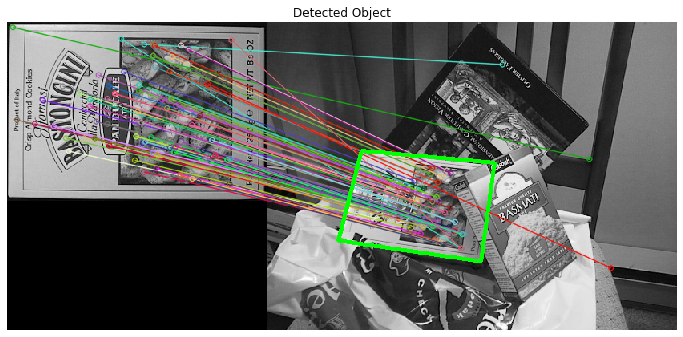

In [11]:
# Detect the keypoints using SIFT Detector, compute the descriptors
detector = cv2.SIFT_create()
keypoints_obj, descriptors_obj = detector.detectAndCompute(query, None)
keypoints_scene, descriptors_scene = detector.detectAndCompute(train, None)

# Matching descriptor vectors with a FLANN based matcher
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(descriptors_obj, descriptors_scene, 2)

# Filter matches using the Lowe's ratio test
ratio_thresh = 0.75
good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = np.empty((max(query.shape[0], train.shape[0]), query.shape[1]+train.shape[1], 3), dtype=np.uint8)
sift_match_output = cv2.drawMatches(query, keypoints_obj, train, keypoints_scene, good_matches, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Localize the object
obj = np.empty((len(good_matches),2), dtype=np.float32)
scene = np.empty((len(good_matches),2), dtype=np.float32)
for i in range(len(good_matches)):
    # Get the keypoints from the good matches
    obj[i,0] = keypoints_obj[good_matches[i].queryIdx].pt[0]
    obj[i,1] = keypoints_obj[good_matches[i].queryIdx].pt[1]
    scene[i,0] = keypoints_scene[good_matches[i].trainIdx].pt[0]
    scene[i,1] = keypoints_scene[good_matches[i].trainIdx].pt[1]

H, _ =  cv2.findHomography(obj, scene, cv2.RANSAC)

# Get the corners from the image (the object to be "detected")
obj_corners = np.empty((4,1,2), dtype=np.float32)
obj_corners[0,0,0] = 0
obj_corners[0,0,1] = 0
obj_corners[1,0,0] = query.shape[1]
obj_corners[1,0,1] = 0
obj_corners[2,0,0] = query.shape[1]
obj_corners[2,0,1] = query.shape[0]
obj_corners[3,0,0] = 0
obj_corners[3,0,1] = query.shape[0]

scene_corners = cv2.perspectiveTransform(obj_corners, H)

# Draw lines between the corners (the mapped object in the scene)
cv2.line(img_matches, (int(scene_corners[0,0,0] + query.shape[1]), int(scene_corners[0,0,1])),\
    (int(scene_corners[1,0,0] + query.shape[1]), int(scene_corners[1,0,1])), (0,255,0), 4)
cv2.line(img_matches, (int(scene_corners[1,0,0] + query.shape[1]), int(scene_corners[1,0,1])),\
    (int(scene_corners[2,0,0] + query.shape[1]), int(scene_corners[2,0,1])), (0,255,0), 4)
cv2.line(img_matches, (int(scene_corners[2,0,0] + query.shape[1]), int(scene_corners[2,0,1])),\
    (int(scene_corners[3,0,0] + query.shape[1]), int(scene_corners[3,0,1])), (0,255,0), 4)
cv2.line(img_matches, (int(scene_corners[3,0,0] + query.shape[1]), int(scene_corners[3,0,1])),\
    (int(scene_corners[0,0,0] + query.shape[1]), int(scene_corners[0,0,1])), (0,255,0), 4)

# Show detected matches
fig, ax = plt.subplots(figsize=(12, 8))
plt.imshow(img_matches, interpolation='nearest')
plt.title('Detected Object')
plt.axis('off')
plt.show()